# CYGNSS L2 Python Module Demonstration

<hr>
<i>Author Info</i><br>
Timothy Lang<br>
timothy.j.lang@nasa.gov
<hr>

### Introduction

Welcome to the CYGNSS L2 Wind Python Module Demonstration. For the time being, I am calling this module `pygnss`. In addition to the `pygnss` source code and this notebook, I am also supplying the `cmap_map` module. This provides the ability to lighten or "wash out" a color table, which is useful when overplotting CYGNSS winds on top of the background winds. Put it in your `PYTHONPATH` along with `pygnss`.

OK, first things first, let's import everything we need and prep our datasets.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pygnss
# cmap_map is also part of SingleDop (https://github.com/nasa/SingleDop)
from singledop.cmap_map import lighten_cmap
# from cmap_map import lighten_cmap
%matplotlib inline

The following cell will need to be updated by you. Input refers to the model or observed winds you ingested into the CYGNSS E2ES. Since the E2ES expects input data to be formatted a certain way, I exploited this to create Python objects to ingest and display these data separate from or alongside the synthetic CYGNSS data.

Output refers to the Level 2 output wind files created by the E2ES.

In the present example, my input data came from a limited 9-km resolution WRF domain, featuring a simulation of the atmosphere above the Indian Ocean during 11/25/2011. Off the coast of India was the developing Tropical Storm 05A. The CYGNSS E2ES was run on a day's worth of WRF background simulation, with E2ES using a time step of 1 min. This is greatly decimated compared to CYGNSS's native resolution of 1 second. 

In [2]:
input_dir = '/Users/tjlang/Documents/CYGNSS/E2ES/datafiles/winds/DYNAMO_WRF/'
input_files = sorted(glob.glob(input_dir+'CYGNSS_Sim_wrfout_d01_2011-11-25_*.nc'))
output_dir = '/Users/tjlang/Documents/CYGNSS/E2ES/run_test_mjo/output/'
output_L2_files = sorted(glob.glob(output_dir+'old/cyg?.L2.20111125-S000000-E235700.e2e.nc'))
print('E2ES Inputs', [os.path.basename(filen) for filen in input_files])
print()
print('E2ES Outputs', [os.path.basename(filen) for filen in output_L2_files])

E2ES Inputs ['CYGNSS_Sim_wrfout_d01_2011-11-25_00:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_01:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_02:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_03:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_04:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_05:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_06:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_07:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_08:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_09:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_10:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_11:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_12:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_13:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_14:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_15:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_16:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_17:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_18:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011-11-25_19:00:00.nc', 'CYGNSS_Sim_wrfout_d01_2011

### Data Plotting

OK, ingesting and plotting the E2ES output data is as simple as 3 lines of code (actually, this can be reduced to two lines, as we'll see later).

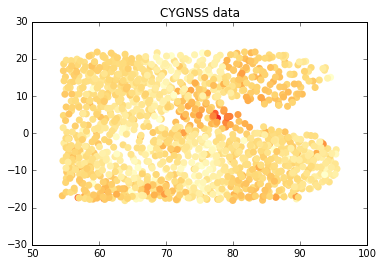

In [3]:
merged_data = pygnss.CygnssMultiSat(output_L2_files)
display = pygnss.CygnssL2WindDisplay(merged_data)
display.specular_plot()

Every specular point is a dot, with color corresponding to wind speed. Well, the above plot is a start. Why don't we spruce it up a bit though?

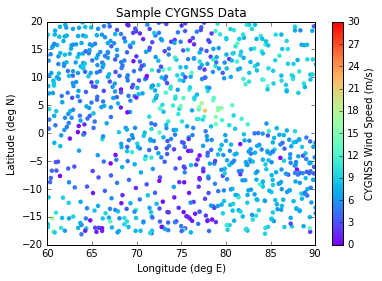

In [4]:
display.specular_plot(colorbar_flag=True, axis_label_flag=True, 
                      title='Sample CYGNSS Data', ms=20,
                      cmap='rainbow', indices=[0,1000], 
                      latrange=[-20,20], lonrange=[60,90])

So the specular_point() method accepts keywords to adjust axes, title, colorbars/maps, marker size, time period (via the indices keyword), etc. See the method's docstring in the source code for more info.

How about comparing synthetic CYGNSS versus "truth"? All it takes is one line of code to get a quick histogram.

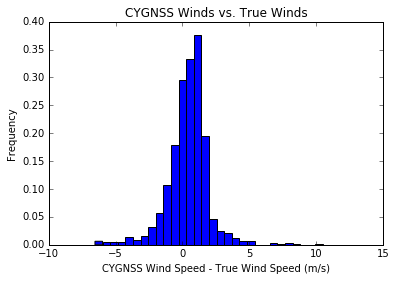

In [5]:
display.histogram_plot(bins=30, axis_label_flag=True)

You can also do a 2D histogram plot. Both histogram options including the ability to threshold on RangeCorrectedGain values via the threshold keyword. There are lots of other keyword options too, for customizing the figure.

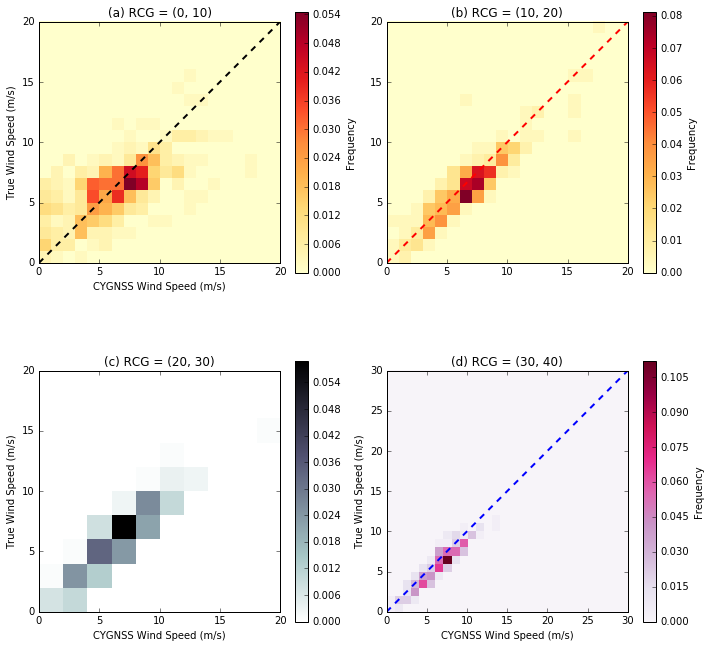

In [7]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 10))
display.hist2d_plot(threshold=[0, 10], cmap='YlOrRd', add_line=True,
                    line_color='k', ax=ax1, title='(a) RCG = (0, 10)',
                    axis_label_flag=True)
display.hist2d_plot(threshold=[10, 20], ax=ax2, title='(b) RCG = (10, 20)')
display.hist2d_plot(threshold=[20, 30], cmap='bone_r', add_line=False,
                    ax=ax3, title='(c) RCG = (20, 30)', axis_label_flag=True,
                    colorbar_label_flag=False, bins=10)
display.hist2d_plot(threshold=[30, 40], bins=30, range=(0, 30), cmap='PuRd',
                    add_line=True, line_color='b', ax=ax4,
                    axis_label_flag=True, title='(d) RCG = (30, 40)')

### The structure of PyGNSS objects

So currently pygnss supports simple ways to get basic geospatial and statistical plots of the L2 wind data, to enable rapid analysis of E2ES output. But how does it actually work? Well, the design is object-oriented and modular, to make it easy to develop new functionality. 

The core object is NetcdfFile, a simplified interface to ingest a netCDF file and obtain all of its variables in an organized manner. Then CygnssSingleSat, a child class of NetcdfFile, provides the actual interface to an individual satellite's data file. The CygnssMultiSat object makes use of multiple CygnssSingleSat objects to ingest the entire constellation's data and organize them appropriately. Finally, the CygnssL2WindDisplay object accepts either CygnssSingleSat or CygnssMultiSat objects (or a list of files from which such objects will be pulled) and gives access to the plotting routines seen above.

Let's get a better sense of how this works by investigating a single satellite's data.

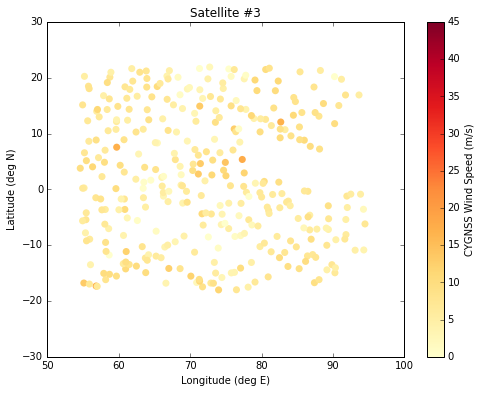

In [9]:
display = pygnss.CygnssL2WindDisplay(output_L2_files[2], number=8)
fig = plt.figure(figsize=(8,6))
display.specular_plot(title='Satellite #3', colorbar_flag=True, axis_label_flag=True, vmax=45)

So, if all you want is a plot, we can directly ingest into a CygnssL2WindDisplay object an individual satellite's file, and the number keyword defines what number of specular points per time step to compare against the satellite object's RangeCorrectedGain attribute. The default is to take the specular points for the top-4 gain values (same as real-life CYGNSS). This is used to help mask out extra specular points. In addition, masking on bad or missing data is also employed when plotting the data.

Currently, land/ocean masking is not employed when plotting the data in this basic manner. That feature will be added soon. However, land can be easily masked when doing a Basemap plot, discussed later.

OK, enough plotting, what is actually in these objects?

In [10]:
sat3 = pygnss.CygnssSingleSat(output_L2_files[2])
print(sat3.variable_list)

['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'GpsID', 'Latitude', 'Longitude', 'WindSpeed', 'TruthWindSpeed', 'ErrorStdDev', 'WindDirection', 'L1bDDMAObservable', 'L1bLESObservable', 'RangeCorrectedGain', 'IncidenceAngle', 'Sigma0', 'MSS', 'SeaSurfaceTemperature']


In [11]:
print(np.shape(sat3.WindSpeed))

(1438, 15)


So all the stuff in the L2 wind files is there, and the shape for many key variables like WindSpeed is (number of time steps, number of possible specular points = 15). Masking is simply used later to cut that down to 4 specular points per time step, or whatever the end user wants.

In [12]:
sat3.get_gain_mask(number=8)
print(sat3.variable_list)

['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'GpsID', 'Latitude', 'Longitude', 'WindSpeed', 'TruthWindSpeed', 'ErrorStdDev', 'WindDirection', 'L1bDDMAObservable', 'L1bLESObservable', 'RangeCorrectedGain', 'IncidenceAngle', 'Sigma0', 'MSS', 'SeaSurfaceTemperature', 'GoodData']


In [13]:
index = 1000
print(sat3.GoodData[index], sat3.RangeCorrectedGain[index])

[0 0 1 1 1 1 0 1 1 0 1 1 0 0 0] [  1.16040754   1.02660429  33.56076431  40.69177628   7.3863306
  25.6035614    1.32105231   7.7874999   19.33204269   0.70918381
   4.15813732   3.27079868   0.           0.           0.        ]


In this case, the top-8 specular points in terms of RangeCorrectedGain at time step = index get GoodData flags = 1. If you just ingest a file using CygnssSingleSat, the gain mask (the GoodData attribute) is not applied automatically. However, the CygnssL2WindDisplay and CygnssMultiSat objects will set this automatically based on user input (or lack thereof), so that the plotting routines will know what to plot. 

Indeed, the CygnssMultiSat object has everything in CygnssSingleSat too, but consolidated to fit data from all the satellites into one object. It even holds all the individual CygnssSingleSat objects used to construct it within its satellites attribute.

In [14]:
print(merged_data.variable_list)
print(np.shape(merged_data.WindSpeed))

['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'GpsID', 'Latitude', 'Longitude', 'WindSpeed', 'TruthWindSpeed', 'ErrorStdDev', 'WindDirection', 'L1bDDMAObservable', 'L1bLESObservable', 'RangeCorrectedGain', 'IncidenceAngle', 'Sigma0', 'MSS', 'SeaSurfaceTemperature', 'GoodData']
(1438, 120)


In [15]:
print(merged_data.satellites)

[<pygnss.CygnssSingleSat object at 0x105d25390>, <pygnss.CygnssSingleSat object at 0x1136af710>, <pygnss.CygnssSingleSat object at 0x1136afa58>, <pygnss.CygnssSingleSat object at 0x1136afcc0>, <pygnss.CygnssSingleSat object at 0x1136aff98>, <pygnss.CygnssSingleSat object at 0x1136af748>, <pygnss.CygnssSingleSat object at 0x11373b3c8>, <pygnss.CygnssSingleSat object at 0x11373b630>]


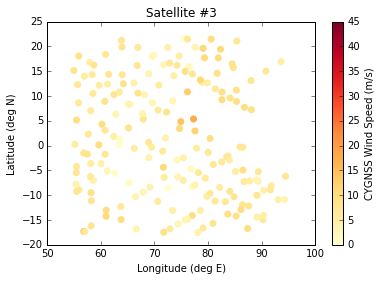

In [16]:
display = pygnss.CygnssL2WindDisplay(merged_data.satellites[2])
display.specular_plot(title='Satellite #3', colorbar_flag=True,
                      axis_label_flag=True, vmax=45)

And now we basically recreated the figure from above, working from the merged_data object itself, although with only the top-4 specular points in terms of RangeCorrectedGain plotted (the default when we created merged_data several cells back). 

### Plotting E2ES input data along with CYGNSS on a Basemap

The pygnss module also can work with the E2ES input data files. The key objects here are E2esInputData (for interfacing with the data file) and InputWindDisplay (for helping plot the data).

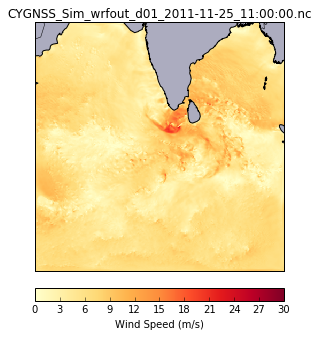

In [17]:
input_data = pygnss.E2esInputData(input_files[11])
fig = plt.figure(figsize=(5,5))
input_display = pygnss.InputWindDisplay(input_data)
input_display.basemap_plot(title=os.path.basename(input_files[11]))


Note the output Basemap object. This is by default returned automatically by the basemap_plot() method. We can take advantage of this to bring in the CYGNSS data, like so:

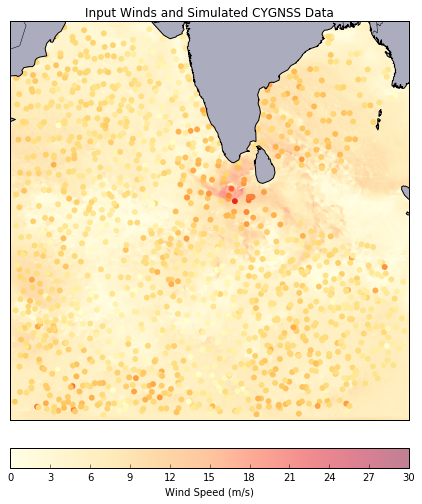

In [18]:
lgist = lighten_cmap(plt.cm.get_cmap('YlOrRd'))
fig = plt.figure(figsize=(8, 8))
input_display = pygnss.InputWindDisplay(input_files[11])
m = input_display.basemap_plot(title='Input Winds and Simulated CYGNSS Data', cmap=lgist)
display = pygnss.CygnssL2WindDisplay(output_L2_files)
display.specular_plot(colorbar_flag=False, axis_label_flag=False, title_flag=False,
                      basemap=m, edge_flag=False, cmap='YlOrRd', ms=35)

Note how InputWindDisplay can accept files directly, bypassing the E2esInputData step. I also lightened the base colormap so the CYGNSS specular points show up a bit better.

And you can plot the data for a single satellite, limit by time, color in the edges of the specular points so they are easier to see, etc.

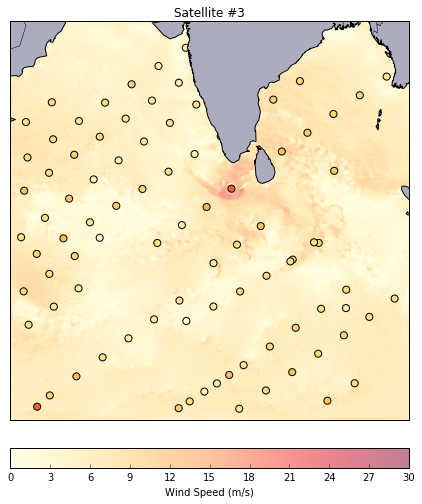

In [19]:
fig = plt.figure(figsize=(8,8))
m = input_display.basemap_plot(title='Satellite #3', cmap=lgist)
ss_display = pygnss.CygnssL2WindDisplay(merged_data.satellites[2])
ss_display.specular_plot(cmap='YlOrRd', colorbar_flag=False, edge_flag=True, 
                         title_flag=False, basemap=m, indices=[0, 400])

You can use a different Basemap than the one created by InputWindDisplay.basemap_plot() to plot CYGNSS data, if you wish. The specular_point() syntax above would be the same.

And that's about it. The rest of this notebook is sparsely documented, but provides examples of how to make other figures, investigate the input and L2 data, etc.

In [20]:
#Remember, you can always ...
help(pygnss)

Help on module pygnss:

NAME
    pygnss

DESCRIPTION
    Title/Version
    -------------
    Python CYGNSS Toolkit (PyGNSS)
    pygnss v0.5
    Developed & tested with Python 2.7 and 3.4
    Last changed 08/10/2015
    
    
    Author
    ------
    Timothy Lang
    NASA MSFC
    timothy.j.lang@nasa.gov
    (256) 961-7861
    
    
    Overview
    --------
    This module enables the ingest, analysis, and plotting of Cyclone Global
    Navigation Satellite System (CYGNSS) End-to-End Simulator (E2ES) input and
    output data. To use, place in PYTHONPATH and use the following import command:
    import pygnss
    
    
    Notes
    -----
    Requires - numpy, matplotlib, Basemap, netCDF4, warnings, os, six
    
    
    Change Log
    ----------
    v0.5 Major Changes (08/10/2015)
    1. Supports Python 3 now.
    
    v0.4 Major Changes (07/02/2015)
    1. Made all code pep8 compliant.
    
    v0.3 Major Changes (03/19/2015)
    1. Documentation improvements. Doing help(pygnss) sho

### Other plotting examples

Below is how I made the individual frames for the animated GIF I showed on the CYGNSS Science Team telecon.

In [21]:
def plot_animation(display, multiple=60):
    maxstep = 1 + np.shape(merged_data.WindSpeed)[0] / multiple
    for i in np.arange(maxstep):
        plt.close()
        index_start = multiple*i
        index_stop = multiple*(i+1)
        print(index_start, index_stop)
        val = str(i)
        if i < 10:
            val = '00' + val
        if i >= 10 and i < 100:
            val = '0' + val
        save='plot_' + val + '.png'
        display.specular_plot(
            colorbar_flag=True, axis_label_flag=True, save=save,
            title='Minutes from 11/25/11 00 UTC: '+str([index_start,index_stop]), 
            ms=25, cmap='gist_ncar', indices=[index_start,index_stop],
            lonrange=[50,100], latrange=[-25,25])

In [22]:
merged_data = pygnss.CygnssMultiSat(output_L2_files, number=4)
display = pygnss.CygnssL2WindDisplay(merged_data)
multiple = 60
plot_animation(display, multiple=multiple)

0.0 60.0
60.0 120.0
120.0 180.0
180.0 240.0
240.0 300.0
300.0 360.0
360.0 420.0
420.0 480.0
480.0 540.0
No good specular points, not plotting
540.0 600.0
No good specular points, not plotting
600.0 660.0
No good specular points, not plotting
660.0 720.0
No good specular points, not plotting
720.0 780.0
No good specular points, not plotting
780.0 840.0
840.0 900.0
900.0 960.0
960.0 1020.0
1020.0 1080.0
1080.0 1140.0
1140.0 1200.0
1200.0 1260.0
No good specular points, not plotting
1260.0 1320.0
No good specular points, not plotting
1320.0 1380.0
No good specular points, not plotting
1380.0 1440.0
No good specular points, not plotting
1440.0 1500.0
No good specular points, not plotting


<hr>
The basics of using pygnss to make a multi-panel plot ... 

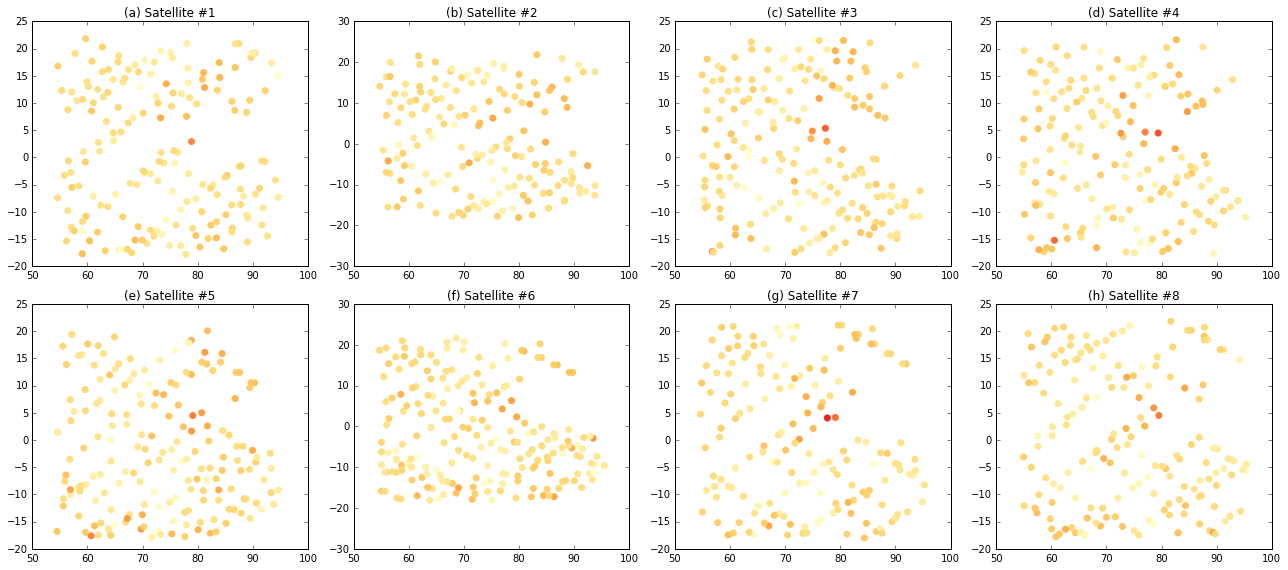

In [23]:
fig = plt.figure(figsize=(18,8))
dis = []
for i, sat in enumerate(merged_data.satellites):  
    dis.append(pygnss.CygnssL2WindDisplay(sat))
ax = fig.add_subplot(241)
dis[0].specular_plot(title='(a) Satellite #1')
ax = fig.add_subplot(242)
dis[1].specular_plot(title='(b) Satellite #2')
ax = fig.add_subplot(243)
dis[2].specular_plot(title='(c) Satellite #3')
ax = fig.add_subplot(244)
dis[3].specular_plot(title='(d) Satellite #4')
ax = fig.add_subplot(245)
dis[4].specular_plot(title='(e) Satellite #5')
ax = fig.add_subplot(246)
dis[5].specular_plot(title='(f) Satellite #6')
ax = fig.add_subplot(247)
dis[6].specular_plot(title='(g) Satellite #7')
ax = fig.add_subplot(248)
dis[7].specular_plot(title='(h) Satellite #8')
plt.tight_layout()

### Data Investigation

In this section I just show some uncommented examples of how to investigate the L2 wind data and input wind data within the pygnss framework.

###### L2 Wind Data Examples

In [24]:
print(np.shape(merged_data.WindSpeed[1100:1300][:]))
cond = merged_data.WindSpeed[1100:1300][:] >= 0
print(merged_data.WindSpeed[1100:1300][:][cond])

(200, 120)
[  7.79118538   6.40286922   8.20931149   8.01824093   2.85147977
   4.74979639  10.21044827   9.12319851   2.75785518   5.34259939
   9.20319557   8.03438473   6.51579762   5.78962469  11.3965559
   8.94681263   8.19636726   9.49036503   9.60351753   5.52019358
   5.8734417    9.70732689   6.6839242    4.78074932   5.61902952
   6.75488186   7.81016779   6.65112209   4.4685688   10.0154829
   8.66683769   2.6442163    8.29262447   8.66084671   9.13581181
   9.68320274   9.83521843  10.77127171   5.86383581   3.87174869
   6.79795837   4.71204615   4.33428288   8.07094002   4.80742836
   7.18309832   6.29567909   6.65452957   3.23883653   8.29984188
   6.93890142   4.40463972   9.45910358  12.21731663   3.60906768
   8.23219395   1.9423281    7.53352213   7.33600235   8.42413902
   6.02424812   3.50309515   7.88573599   4.79846096   9.94011593
  13.4845686    8.02072525   7.93054152   4.31863546   7.38147306
   5.83937168   7.93733168   3.32653379   9.03732872  12.46417236
 

In [25]:
print(merged_data.satellites[3].RangeCorrectedGain[merged_data.satellites[3].GoodData == 1])

[  0.           0.           0.         ...,  11.64719677   7.67701626
  39.5333786 ]


In [26]:
cond = merged_data.WindSpeed >= 0
print(merged_data.WindSpeed[cond])
print(merged_data.TruthWindSpeed[cond])

[  2.06948256   9.37177753   6.64118481 ...,   7.7009306    5.05140781
  16.4661808 ]
[  5.93988657   7.10469675   5.21783447 ...,   6.96810961   2.76538372
  10.03850651]


In [27]:
print(np.shape(merged_data.Longitude))
indices=[180,240]
print(np.shape(merged_data.Longitude[indices[0]:indices[1]][:]))

(1438, 120)
(60, 120)


###### Input Wind Data Examples

In [28]:
print(input_data.latitude)
print
print(input_data.longitude)

[-18.6465683  -18.55637169 -18.46617508 -18.37598038 -18.28578377
 -18.19558716 -18.10539055 -18.01519585 -17.92499924 -17.83480263
 -17.74460602 -17.65441132 -17.56421471 -17.4740181  -17.38382149
 -17.29362679 -17.20343018 -17.11323357 -17.02303696 -16.93284225
 -16.84264565 -16.75244904 -16.66225243 -16.57205772 -16.48186111
 -16.39166451 -16.3014679  -16.21127319 -16.12107658 -16.03087997
 -15.94068336 -15.85048771 -15.76029205 -15.67009544 -15.57989883
 -15.48970318 -15.39950752 -15.30931091 -15.2191143  -15.12891865
 -15.03872299 -14.94852638 -14.85832977 -14.76813412 -14.67793751
 -14.58774185 -14.49754524 -14.40734959 -14.31715298 -14.22695732
 -14.13676071 -14.0465641  -13.95636845 -13.86617279 -13.77597618
 -13.68577957 -13.59558392 -13.50538826 -13.41519165 -13.32499504
 -13.23479939 -13.14460373 -13.05440712 -12.96421051 -12.87401485
 -12.7838192  -12.69362259 -12.60342598 -12.51323032 -12.42303467
 -12.33283806 -12.24264145 -12.15244579 -12.06225014 -11.97205353
 -11.88185

In [29]:
print(np.max(input_data.latitude), np.min(input_data.latitude))
print(np.max(input_data.longitude), np.min(input_data.longitude))

22.3927 -18.6466
95.9851 54.0149


In [30]:
print(input_data.time, np.shape(input_data.northward_wind))

[ -6.18198876e+10] (1, 456, 467)


In [31]:
print(np.shape(input_data.WindSpeed), np.shape(input_data.longitude),
      np.shape(input_data.latitude))

(1, 456, 467) (467,) (456,)
